# Fitting a smoother with moments constraint

In [1]:
from smoother import Smoother, MomentConstraint

import matplotlib.pyplot as plt
import numpy as np

In [2]:
lower_bound, upper_bound = -3, 3
mean_const = MomentConstraint(0, degree=1)
std_const = MomentConstraint(1, degree=2, type_='central', norm=True)
smoother = Smoother().fit(lower_bound, upper_bound, [mean_const, std_const])

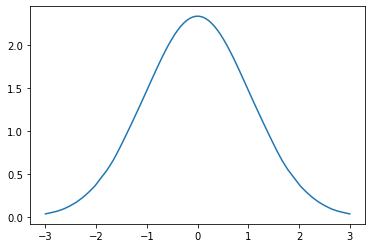

In [3]:
x = np.linspace(lower_bound, upper_bound, num=100)
f_x = np.array([smoother.pdf(x_i) for x_i in x])
plt.plot(x, f_x)

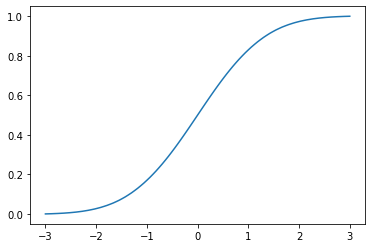

In [4]:
F_x = np.array([smoother.cdf(x_i) for x_i in x])
plt.plot(x, F_x)

# Fitting a smoother with mass constraint

In [5]:
from smoother import Smoother, DerivativeObjective, MassConstraint

import numpy as np
import matplotlib.pyplot as plt

In [6]:
lower_bound, upper_bound = -3, 3
p25_const = MassConstraint(lower_bound, -.67, mass=.25)
p50_const = MassConstraint(-.67, 0, mass=.25)
p75_const = MassConstraint(0, .67, mass=.25)
p100_const = MassConstraint(.67, upper_bound, mass=.25)
smoother = Smoother().fit(
    lower_bound, 
    upper_bound,
    [p25_const, p50_const, p75_const, p100_const],
    objective=DerivativeObjective(1)
)

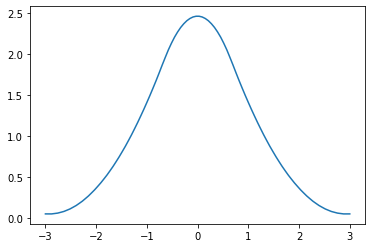

In [7]:
x = np.linspace(lower_bound, upper_bound, num=100)
f_x = np.array([smoother.pdf(x_i) for x_i in x])
plt.plot(x, f_x)

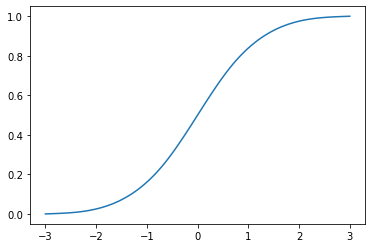

In [8]:
F_x = np.array([smoother.cdf(x_i) for x_i in x])
plt.plot(x, F_x)

# Fit a conditional distribution

In [9]:
from smoother import ConditionalDistribution

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, norm
from sklearn.model_selection import RandomizedSearchCV

In [10]:
x = np.linspace(-3, 3)
given = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    [.5, .5]
])
distributions = [
    norm(0, 1), norm(0, 2), norm(1, 1), norm(1, 2), norm(.5, 1.5)
]

In [11]:
class joint_expon():
    def __init__(self, size=1):
        self.size = size
        self.rv = expon()
        
    def rvs(self, **kwargs):
        return self.rv.rvs(size=self.size, **kwargs)
    
param_distributions = dict(
    metric=['chi2', 'linear', 'poly', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
    gamma=expon(0, 10),
    coef0=expon(),
    feature_scale=joint_expon(size=given.shape[1])
)

dist = RandomizedSearchCV(ConditionalDistribution(), param_distributions, n_iter=30)
dist.fit(given, distributions)
print('Training score (negative Wasserstein):', dist.score(given, distributions))
print('Best kernel metric:', dist.best_estimator_.metric)
print('Best gamma:', dist.best_estimator_.gamma)
print('Best feature scale:', dist.best_estimator_.feature_scale)

C:\Users\DBSpe\smoother\smoother\distribution.py:20: RuntimeWarning: invalid value encountered in true_divide
  self._f_x = f_x / s
C:\Users\DBSpe\smoother\smoother\distribution.py:20: RuntimeWarning: invalid value encountered in true_divide
  self._f_x = f_x / s
C:\Users\DBSpe\smoother\smoother\distribution.py:20: RuntimeWarning: invalid value encountered in true_divide
  self._f_x = f_x / s
C:\Users\DBSpe\smoother\smoother\distribution.py:20: RuntimeWarning: invalid value encountered in true_divide
  self._f_x = f_x / s
C:\Users\DBSpe\smoother\smoother\distribution.py:20: RuntimeWarning: invalid value encountered in true_divide
  self._f_x = f_x / s
C:\Users\DBSpe\smoother\smoother\distribution.py:20: RuntimeWarning: invalid value encountered in true_divide
  self._f_x = f_x / s
C:\Users\DBSpe\smoother\smoother\distribution.py:20: RuntimeWarning: invalid value encountered in true_divide
  self._f_x = f_x / s


Training score (negative Wasserstein): -0.15173789570564927
Best kernel metric: laplacian
Best gamma: 1.4784073516599263
Best feature scale: [1.51214275 1.26951972]


C:\Users\DBSpe\smoother\smoother\distribution.py:20: RuntimeWarning: invalid value encountered in true_divide
  self._f_x = f_x / s


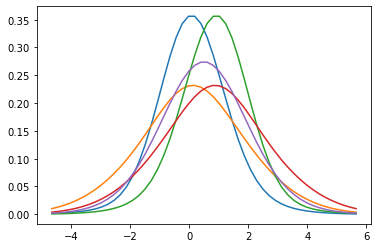

In [12]:
estimated_distributions = dist.predict(given)
[plt.plot(d.x, d.f_x) for d in estimated_distributions]
plt.show()

In [ ]:
[plt.plot(dist.best_estimator_.x, d.pdf(dist.best_estimator_.x)) for d in distributions]
plt.show()

# Create a Bayesian network

In [ ]:
from smoother import Node, sort_nodes

In [ ]:
node0 = Node(distribution=norm())
node1 = Node(distribution=norm())
# conditional distribution from above
node2 = Node(in_nodes=[node0, node1], distribution=dist)

In [ ]:
node2.clear_rvs()
node2.rvs(1000)
for node in (node0, node1, node2):
    plt.hist(node.frozen_rvs)
    plt.show()

In [ ]:
# sort nodes in the order in which they should be estimated
node0 = Node(name=0)
node1 = Node(in_nodes=[node0], name=1)
node2 = Node(in_nodes=[node0, node1], name=2)
node3 = Node(in_nodes=[node1, node2], name=3)
nodes = [node3, node2, node1, node0]
sorted_nodes = sort_nodes(nodes)
', '.join(str(node.name) for node in sorted_nodes)